In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
def convolve2D(image, mask, padding=0):

    # Inversão da matriz, necessário para realizr a convolução
    mask = np.flipud(np.fliplr(mask))

    # Definição dos tamanhos da imagem e da máscara
    maskLinhas = mask.shape[0]
    maskColunas = mask.shape[1]
    linhas = image.shape[0]
    colunas = image.shape[1]  

    # Definição dos novos valores das dimensões (x,y) 
    xOutput = int(((linhas - maskLinhas + 2 * padding)) + 1)
    yOutput = int(((colunas - maskColunas + 2 * padding)) + 1)
    # Nova matriz, contendo as novas dimensões calculadas:
    output = np.zeros((xOutput, yOutput))

    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        
        # Aplicando a imagem original dentro da nova matriz (com as novs proporções)
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        #print(imagePadded)
    
    # Caso o padding não precise ser aplicado, as dimensões da imagem se mantém
    else:
        imagePadded = image

    # A imagem é percorrida e as operações da convolução são aplicadas    
    for y in range(image.shape[1]):

        if y > image.shape[1] - maskColunas:
            break

        for x in range(image.shape[0]):
            if x > image.shape[0] - maskLinhas:
                break

            try:
                # Aplica a operação da convolução: os elementos multiplicados com a máscara 
                # são somados e armazenados na nova matriz da imagem 
                output[x, y] = (mask * imagePadded[x: x + maskLinhas, y: y + maskColunas]).sum()
            except:
                break

    return output

In [4]:
# Aplicando o filtro de realce de roberts
robertsMask = [[1,0],
               [0,-1]]
robertsMask2 = np.fliplr(robertsMask)

In [5]:
sobelMask = [[-1,-2,-1],
               [0,0,0],
               [1,2,1]]
sobelMask2 = [[-1,0,1],
              [-2,0,2],
              [-1,0,1]]

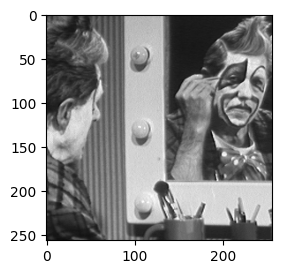

In [6]:
# Leitura da imagem original cln1

plt.subplot(1,2,1)
img = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)
linhas = img.shape[0]
colunas = img.shape[1]
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

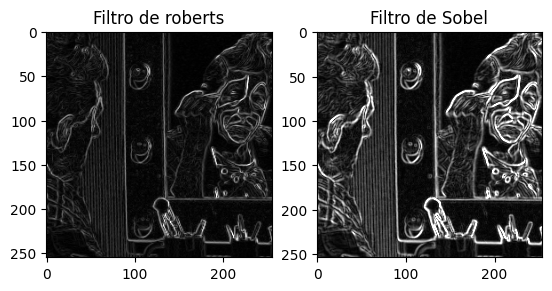

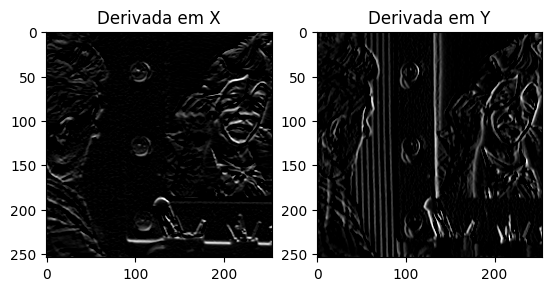

In [7]:
# Aplique os filtros de realce Sobel e Roberts na imagem. 
# Mostre, para o caso do Sobel, uma imagem representando a 
# derivada em x e outra imagem representando a derivada em y

plt.subplot(1,2,1)
robertsImg = convolve2D(img, robertsMask, padding=0)
robertsImg2 = convolve2D(img, robertsMask2, padding=0)
robertsImgF = abs(robertsImg) + abs(robertsImg2)
plt.title('Filtro de roberts')
plt.imshow(robertsImgF, cmap='gray', vmin=0, vmax=255)

#======================================================================================================

# Aplicando o filtro de realce de Sobel

plt.subplot(1,2,2)
imgDiv = np.zeros((linhas,colunas))
for i in range(linhas):
        for j in range(colunas):
            imgDiv[i][j] = math.floor(img[i][j]/2)

sobelImg = convolve2D(imgDiv, sobelMask, padding=0)
sobelImg2 = convolve2D(imgDiv, sobelMask2, padding=0)
sobelImgF = abs(sobelImg) + abs(sobelImg2)

plt.title('Filtro de Sobel')
plt.imshow(sobelImgF, cmap='gray', vmin=0, vmax=255)
plt.show()

#======================================================================================================

plt.subplot(1,2,1)
plt.title('Derivada em X')
plt.imshow(sobelImg, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.title('Derivada em Y')
plt.imshow(sobelImg2, cmap='gray', vmin=0, vmax=255)
plt.show()

In [8]:
# Mascara de média
def blurKernel(size):
    # Matriz 'lst' é uma intermediária que cria cada row da matriz principal 'm'
    lst = []
    m = []
    # Criação das linhas da matriz de zeros
    for i in range(0,size):
        for j in range(0,size):
            lst.append(1)   
        # Coloca a linha na matriz principal    
        m.append(lst)    
        # Zera a matriz intermediária
        lst = []
    
    #Cáculo da média
    for i in range(0,size):
        for j in range(0,size):
            m[i][j] = m[i][j]/(size*size)

    return m

Utilizando a imagem do exercício anterior, realce as bordas utilizando 
(a) Filtro Laplaciano. 
(b) Unsharp masking. 
(c) Highboost filtering (escolher um k). (d) K <1 para atenuar

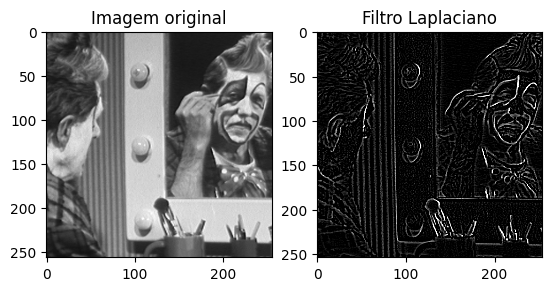

In [9]:
plt.subplot(1,2,1)
plt.title('Imagem original')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

# Aplicando o filtro Laplaciano
laplaceMask = [[1,1,1],
              [1,-8,1],
               [1,1,1]]
laplaceImg = convolve2D(img, laplaceMask, padding=0)

plt.subplot(1,2,2)           
plt.title('Filtro Laplaciano')
plt.imshow(laplaceImg, cmap='gray', vmin=0, vmax=255)
plt.show()

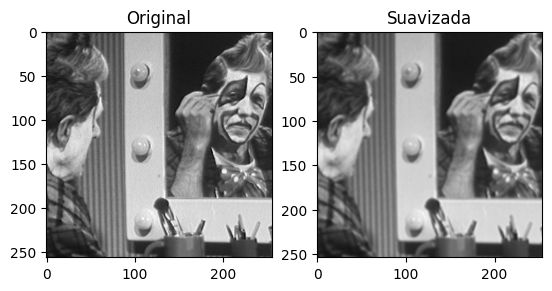

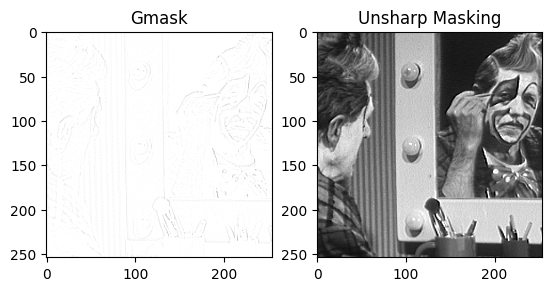

In [10]:
# Aplicando o Unsharp Masking
maskM = blurKernel(3)
imgSuavizada = convolve2D(img, maskM, padding=0) 

plt.subplot(1,2,1)     
plt.title('Original')      
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,2,2)

#===========================================================

plt.title('Suavizada')
plt.imshow(imgSuavizada, cmap='gray', vmin=0, vmax=255)
plt.show()

#===========================================================

nMask = [[0,0,0],
         [0,1,0],
         [0,0,0]]
neutral = convolve2D(img, nMask, padding=0)  
unsharpMask = neutral - imgSuavizada

unsharpMaskInv = np.zeros((unsharpMask.shape[0],unsharpMask.shape[1]))
for i in range(0,unsharpMask.shape[0]):
    for j in range(0,unsharpMask.shape[1]):
        unsharpMaskInv[i][j] = 255 - unsharpMask[i][j]

#===========================================================

plt.subplot(1,2,1)
plt.title('Gmask')
plt.imshow(unsharpMaskInv, cmap='gray', vmin=0, vmax=255)

#===========================================================

unsharp = neutral + unsharpMask
plt.subplot(1,2,2)
plt.title('Unsharp Masking')
plt.imshow(unsharp, cmap='gray', vmin=0, vmax=255)
plt.show()

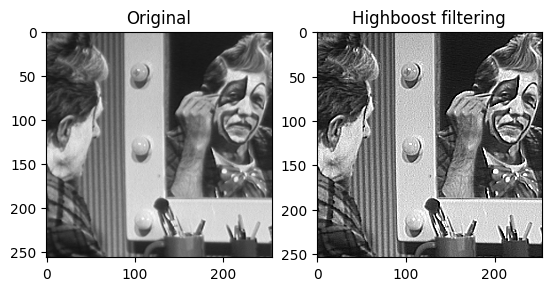

In [11]:
# Aplicando o Highboost filtering

plt.subplot(1,2,1)     
plt.title('Original')      
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.title('Highboost filtering')
highboost = neutral + (unsharpMask * 3)
plt.imshow(highboost, cmap='gray', vmin=0, vmax=255)


Aplique o operador Sobel imagem original abaixo e obtenha as outras imagens conforme descrição.We can see that the intensity of many pixels on the surface is as high as along the actual edges.One reason is that the output of many edge pixels is greater than the maximum pixel value and therefore they are `cut off' at 255. 
To avoid this overflow we scale the range image by a factor 0.25 prior to the edge detection and then normalize the output, as can be seen in (c)

In [12]:
imgRen = cv2.imread("ren1.png", cv2.IMREAD_GRAYSCALE)
linhas2 = imgRen.shape[0]
colunas2 = imgRen.shape[1]

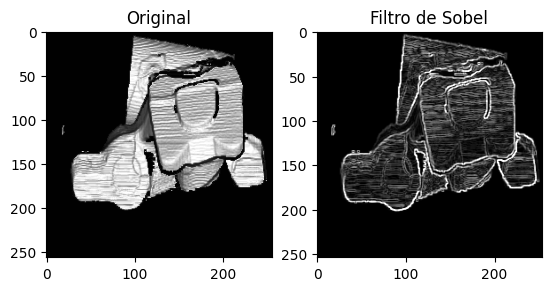

In [13]:

plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(imgRen, cmap='gray', vmin=0, vmax=255)

# Aplicando o filtro de realce de Sobel
# com valores da imagem reduzidos em 0,25
# afim de evitar o overflow

plt.subplot(1,2,2)
imgDiv = np.zeros((linhas2,colunas2))
for i in range(linhas2):
        for j in range(colunas):
            imgDiv[i][j] = math.floor(imgRen[i][j] * 0.25)

sobelImg = convolve2D(imgDiv, sobelMask, padding=0)
sobelImg2 = convolve2D(imgDiv, sobelMask2, padding=0)

sobelImgF = abs(sobelImg) + abs(sobelImg2)
plt.title('Filtro de Sobel')
plt.imshow(sobelImgF, cmap='gray', vmin=0, vmax=255)
plt.show()

In [14]:
imgUfo = cv2.imread("ufo2.png", cv2.IMREAD_GRAYSCALE)
linhas3 = imgUfo.shape[0]
colunas3 = imgUfo.shape[1]

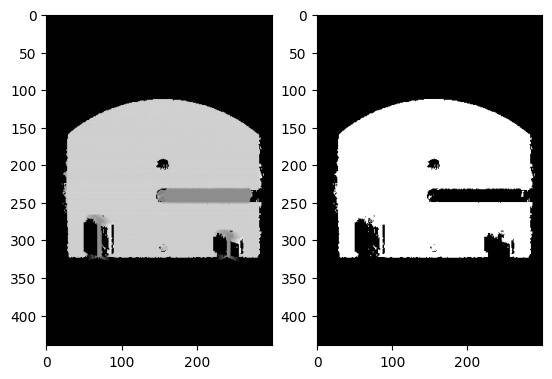

In [15]:
# Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

plt.subplot(1,2,1)
plt.imshow(imgUfo, cmap='gray', vmin=0, vmax=255)

# limiarização utilizando o valor 150:
for i in range(linhas3):
    for j in range(colunas3):
        if imgUfo[i][j] < 150:
            imgUfo[i][j] = 0
        else:
            imgUfo[i][j] = 255

plt.subplot(1,2,2)
plt.imshow(imgUfo, cmap='gray', vmin=0, vmax=255)
plt.show()

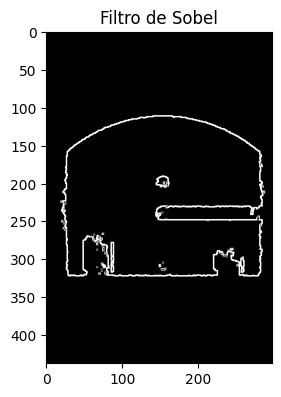

In [16]:

# Aplicando o filtro de realce de Sobel
# com valores da imagem reduzidos em 0,25
# afim de evitar o overflow

plt.subplot(1,2,1)
imgDiv = np.zeros((linhas3,colunas3))
for i in range(linhas3):
        for j in range(colunas3):
            imgDiv[i][j] = math.floor(imgUfo[i][j] * 0.25)

sobelImg = convolve2D(imgDiv, sobelMask, padding=0)
sobelImg2 = convolve2D(imgDiv, sobelMask2, padding=0)

sobelImgF = abs(sobelImg) + abs(sobelImg2)
plt.title('Filtro de Sobel')
plt.imshow(sobelImgF, cmap='gray', vmin=0, vmax=255)
plt.show()

In [17]:
imgUfo2 = cv2.imread("ufo2noi2.png", cv2.IMREAD_GRAYSCALE)
linhas4 = imgUfo2.shape[0]
colunas4 = imgUfo2.shape[1]

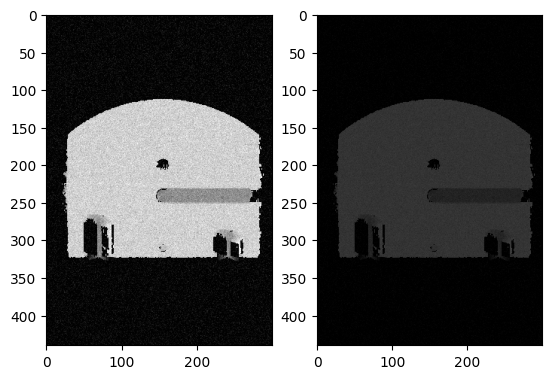

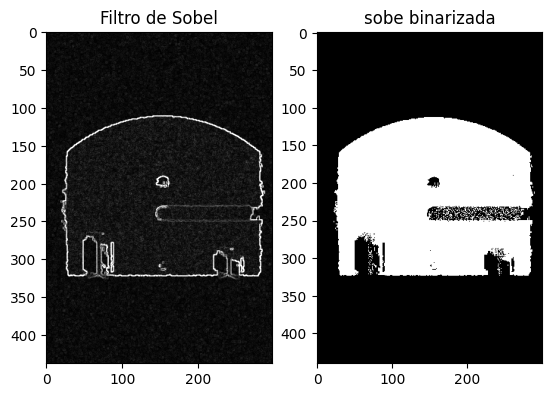

In [18]:
# Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150
plt.subplot(1,2,1)
plt.imshow(imgUfo2, cmap='gray', vmin=0, vmax=255)

# Aplicando o filtro de realce de Sobel
# com valores da imagem reduzidos em 0,25
# afim de evitar o overflow

plt.subplot(1,2,2)
imgDiv2 = np.zeros((linhas4,colunas4))
for i in range(linhas4):
        for j in range(colunas4):
            imgDiv2[i][j] = math.floor(imgUfo2[i][j] * 0.25)
plt.imshow(imgDiv2, cmap='gray', vmin=0, vmax=255)
plt.show()

sobelImg = convolve2D(imgDiv2, sobelMask, padding=0)
sobelImg2 = convolve2D(imgDiv2, sobelMask2, padding=0)
sobelImgF = abs(sobelImg) + abs(sobelImg2)
plt.subplot(1,2,1)
plt.title('Filtro de Sobel')
plt.imshow(sobelImgF, cmap='gray', vmin=0, vmax=255)

# limiarização utilizando o valor 150:
for i in range(linhas4):
    for j in range(colunas4):
        if imgUfo2[i][j] < 150:
            imgUfo2[i][j] = 0
        else:
            imgUfo2[i][j] = 255

plt.subplot(1,2,2)
plt.title('sobe binarizada')
plt.imshow(imgUfo2, cmap='gray', vmin=0, vmax=255)

plt.show()